In [1]:
#import required libs
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import nltk
from collections import Counter
from langdetect import detect
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
#load data
df = pd.read_csv('/content/drive/MyDrive/Visable Cdoing Challange/sample_data.csv',
                 delimiter=',', encoding='utf-8')

# Basic exploration of data

In [4]:
# Display the dimensions of the DataFrame
print("Data Dimensions:", df.shape)

# Display the first few rows of the DataFrame
print("Sample Data:")
print(df.head())

Data Dimensions: (37295, 2)
Sample Data:
                           text label
0                 zucker fabrik    ft
1  Lebensmittel kommssionierung    ft
2               geländer biegen    mr
3  gebäudeausrüstung technische    ct
4         kürbiskernöl softgels    ft


In [5]:
# Summary statistics
print("Summary Statistics:")
print(df.describe().to_string())

Summary Statistics:
         text  label
count   37295  37195
unique  35503      6
top               ft
freq      300  11226


In [8]:
#Count of data poits in each class
label_counts = df['label'].value_counts()
print("Label Distribution:")
print(label_counts)

Label Distribution:
ft     11226
pkg     9617
ct      5061
mr      5016
ch      3688
cnc     2587
Name: label, dtype: int64


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
text       0
label    100
dtype: int64


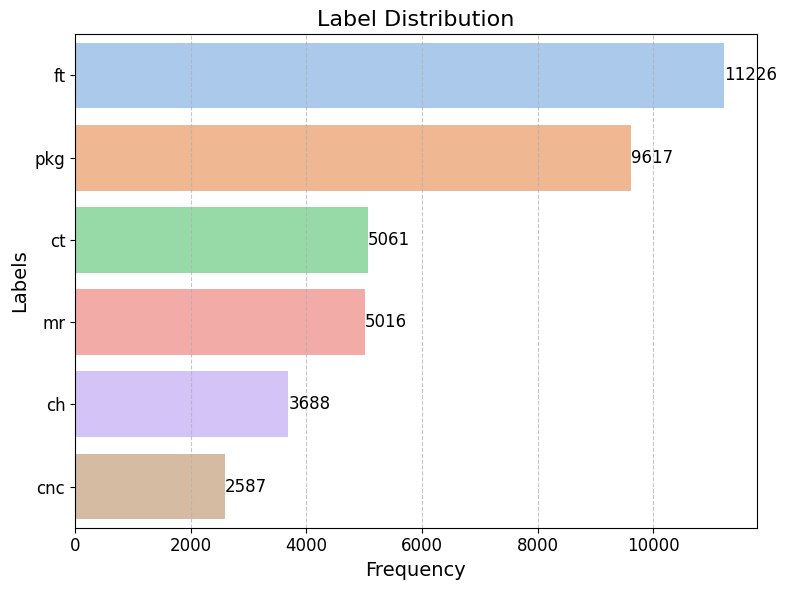

In [18]:
##plot to see the label distribution
colors = sns.color_palette('pastel')

# Analyze label distribution
label_counts = df['label'].value_counts()

# Visualize label distribution using a horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.values, y=label_counts.index, palette=colors)

# Add data labels
for index, value in enumerate(label_counts.values):
    plt.text(value, index, str(value), fontsize=12, ha='left', va='center')

plt.title('Label Distribution', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


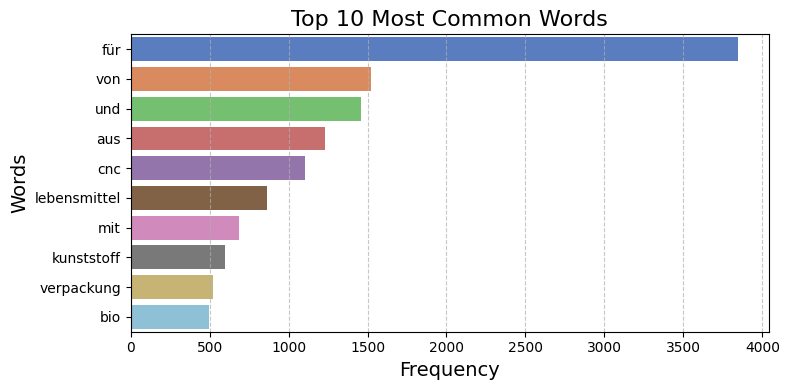

In [19]:
# Tokenize text and count word frequencies
words = ' '.join(df['text']).split()
word_counts = Counter(words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Extract words and frequencies
words = [word[0] for word in top_10_words]
frequencies = [word[1] for word in top_10_words]

# Create a horizontal bar plot using seaborn with a muted color palette
plt.figure(figsize=(8, 4))
sns.barplot(x=frequencies, y=words, palette='muted')  # Horizontal bar plot with muted color palette
plt.title('Top 10 Most Common Words', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines on the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [29]:
# Explore text characteristics and sequence lengths
df['phrase_length'] = df['text'].apply(lambda x: len(x.split()))
print("Maximum Phrase Length:",df['phrase_length'].max())
print('__'*80)
print("Maximum Phrase Length:",df['phrase_length'].min())
print('__'*80)
print("Average Phrase Length:", df['phrase_length'].mean())
print('__'*80)
print("Median Phrase Length:", df['phrase_length'].median())

Maximum Phrase Length: 93
________________________________________________________________________________________________________________________________________________________________
Maximum Phrase Length: 0
________________________________________________________________________________________________________________________________________________________________
Average Phrase Length: 2.4924520713232337
________________________________________________________________________________________________________________________________________________________________
Median Phrase Length: 2.0


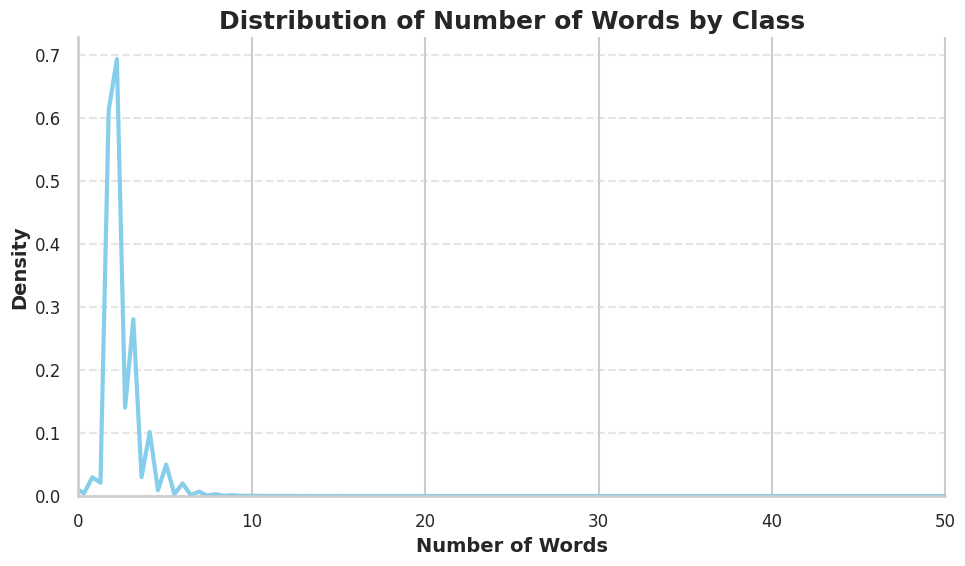

In [62]:
# Set the style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the KDE plot
sns.kdeplot(df['text'].apply(lambda x: len(x.split())), color='skyblue', linewidth=3)

# Add title and labels
plt.title('Distribution of Number of Words by Class', fontsize=18, fontweight='bold')
plt.xlabel('Number of Words', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')

# Customize ticks and grid lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove the box around the plot
sns.despine()

# Zoom in by setting x-axis limits
plt.xlim(0, 50)  # Adjust the limits according to your preference

# Show the plot
plt.tight_layout()
plt.show()


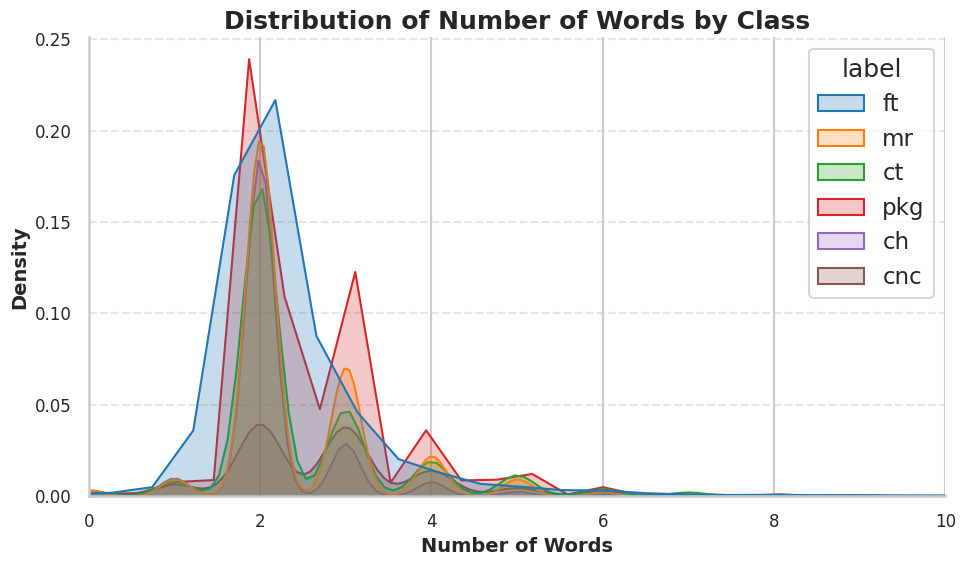

In [72]:
# Set the style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the KDE plot
sns.kdeplot(data=df, x=df['text'].apply(lambda x: len(x.split())), hue='label', shade=True)

# Add title and labels
plt.title('Distribution of Number of Words by Class', fontsize=18, fontweight='bold')
plt.xlabel('Number of Words', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')

# Customize ticks and grid lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove the box around the plot
sns.despine()

# Zoom in by setting x-axis limits
plt.xlim(0, 10)  # Adjust the limits according to your preference

# Show the plot
plt.tight_layout()
plt.show()


In [42]:


# Create an empty dataframe to store Chinese text data
chinese_data = pd.DataFrame(columns=df.columns)

# Compile the regular expression pattern to match Chinese characters
chinese_pattern = re.compile(r'[\u4e00-\u9fff]')

# Iterate through the data and append rows with Chinese text to the new dataframe
for index, row in df.iterrows():
    text = row['text']
    if chinese_pattern.search(text):
        chinese_data = chinese_data.append(row, ignore_index=True)

chinese_data.sample(10)

,text,label,phrase_length
277,吉祥,mr,1
155,吉祥,ch,1
182,吉祥,ch,1
48,吉祥,ct,1
181,吉祥,ct,1
82,吉祥,cnc,1
284,吉祥,ch,1
192,吉祥,ch,1
140,吉祥,ch,1
143,吉祥,mr,1


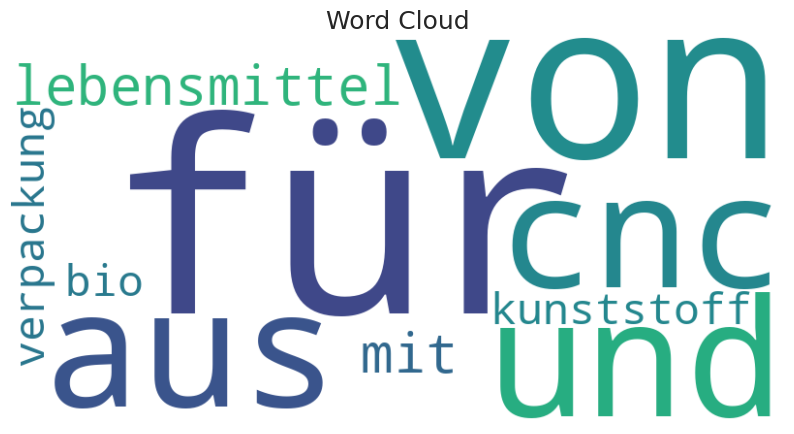

In [43]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

In [49]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame with two categorical columns

# Create a contingency table
contingency_table = pd.crosstab(df['text'], df['label'])

# Compute the Chi-square statistic, p-value, degrees of freedom, and expected frequencies
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min((r - 1), (k - 1)))

# Display Cramér's V
print("Cramér's V:", cramers_v)

Cramér's V: 0.989547786403817


In [55]:
# Assuming 'df' is your DataFrame with the column 'value'
df['phrase_length'] = df['text'].apply(lambda x: len(x.split()))
# Calculate the first quartile (Q1)
Q1 = df['phrase_length'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['phrase_length'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['phrase_length'] < lower_bound) | (df['phrase_length'] > upper_bound)]

# Display outliers
print("Outliers:")
print(len(outliers))


Outliers:
2015


In [57]:
# Assuming 'df' is your DataFrame with the column 'value'

# Calculate the mean and standard deviation
mean_value = df['phrase_length'].mean()
std_dev = df['phrase_length'].std()

# Calculate the Z-score for each data point
df['z_score'] = (df['phrase_length'] - mean_value) / std_dev

# Define the threshold for identifying outliers
z_score_threshold = 3

# Find outliers
outliers = df[np.abs(df['z_score']) > z_score_threshold]

# Display outliers
print("Outliers:")
print(len(outliers))

Outliers:
179



## **Report based on exploratory data analysis**


1.   The dataset consists of 37,295 rows and 2 columns: 'text' and 'labels'.
---
2.   **Summary Statistics**:

> The 'text' column has 37,295 entries, but only 35,503 unique texts.
The 'label' column has 37,195 non-null entries, distributed across 6 unique labels.
The most frequent label is 'ft', occurring 11,226 times.


---


3. **Label Distribution**:
> The label distribution reveals 'ft' as the most common, followed by 'pkg', 'ct', 'mr', 'ch', and 'cnc'.



---



4. **Missing Values**:
> There are no missing values in the 'text' column, but 100 missing values in the 'label' column. But there are some empty text, i.e ust white spaces no words in the text column


---


5. **Phrase Length Statistics**:
> Maximum phrase length is 93 words, with an average of approximately 2.49 words and a median of 2.0 words.
The maximum phrase length is mentioned twice in the provided points.


---


6. **KDE Plot**:
> The KDE plot of the distribution of the number of words in each text is very left-skewed, indicating a higher concentration of shorter phrases.


---


7. **Distribution of Number of Words by Class**:
> Most data instances have phrase lengths between 2-4 words, indicating a concise nature of the text data across classes.


---


8. **Text Composition**:
> Despite being labeled as German, the dataset contains Chinese words, emails, and numbers, suggesting potential data quality issues or mixed language content.


---


9. **Correlation using Cramér's V**:
> The high correlation coefficient of 0.9895 indicates a strong association between the categorical variables.


---


10. **Outlier Detection**:
> Using IQR initially detected approximately 2015 outliers.
Subsequently, using Z-score with a threshold of 3, 179 data points were identified as outliers, reflecting a relatively normal distribution with outliers indicating potential anomalies or irregularities.



---


**Further Insights**:

 >The presence of Chinese words, emails, and numbers within a dataset labeled as German suggests the need for thorough data cleaning and verification processes.
The left-skewed distribution of phrase lengths implies that most text instances are concise, potentially indicating a specific domain or style of communication.
The high correlation between labels using Cramér's V indicates strong association among classes, which could be valuable for classification tasks.
Outlier detection using Z-score highlights potential data anomalies or irregularities that may require further investigation, contributing to data quality improvement and model performance optimization


# Preprocessing and Cleaning of data based on previous findings


In [64]:
'''prepare_data function performs various data
cleaning and preprocessing steps to ensure the data is ready
for further analysis or modeling'''

import re
import nltk
from nltk.corpus import stopwords
from scipy import stats

def prepare_data(data):
    data = data.dropna()

    # Define regular expression patterns
    email_pattern = re.compile(r'@')
    chinese_pattern = re.compile(r'[\u4e00-\u9fff]')

    # Function to check if text contains '@', Chinese words, or numbers
    def contains_invalid_text(text):
        return bool(email_pattern.search(text) or chinese_pattern.search(text))

    # Filter rows where 'text' column contains '@', Chinese words, or numbers
    data = data[~data['text'].apply(contains_invalid_text)]

    # Preprocess text
    def preprocess(text):
        # Lowercasing
        text = text.lower()

        # Tokenization
        tokens = nltk.word_tokenize(text)

        # Remove stopwords
        german_stop_words = set(stopwords.words('german'))
        filtered_tokens = [token for token in tokens if token not in german_stop_words]
        preprocessed_text = ' '.join(filtered_tokens)

        return preprocessed_text

    data['text'] = data['text'].apply(preprocess)

    # Remove brackets and special characters
    data['text'] = data['text'].apply(lambda x: re.sub(r'[-\[\]\(\)#$%*?,+−]', ' ', x))

    # Remove decimals
    data['text'] = data['text'].apply(lambda x: x.replace(".", "").replace("-", ""))
    data = data[data['text'].apply(lambda x: len(x.split())) > 0]

    # Calculate the Z-score for each data point
    data['num_words'] = data['text'].apply(lambda x: len(x.split()))
    z_scores = stats.zscore(data['num_words'])

    # Define a threshold for outliers (e.g., 3 standard deviations from the mean)
    threshold = 3
    outliers = data[abs(z_scores) > threshold]

    # Remove outliers from the dataset
    data = data[abs(z_scores) <= threshold]
    data = data.drop('num_words', axis=1)
    return data

# Prepare the data
data = prepare_data(df)


In [65]:
data['phrase_length_pre'] = data['text'].apply(lambda x: len(x.split()))
print("Maximum Phrase Length:",data['phrase_length_pre'].max())
print("Minumum Phrase Length:",data['phrase_length_pre'].min())
print("Average Phrase Length:", data['phrase_length_pre'].mean())
print("Median Phrase Length:", data['phrase_length_pre'].median())

Maximum Phrase Length: 5
Minumum Phrase Length: 1
Average Phrase Length: 2.232339176428235
Median Phrase Length: 2.0


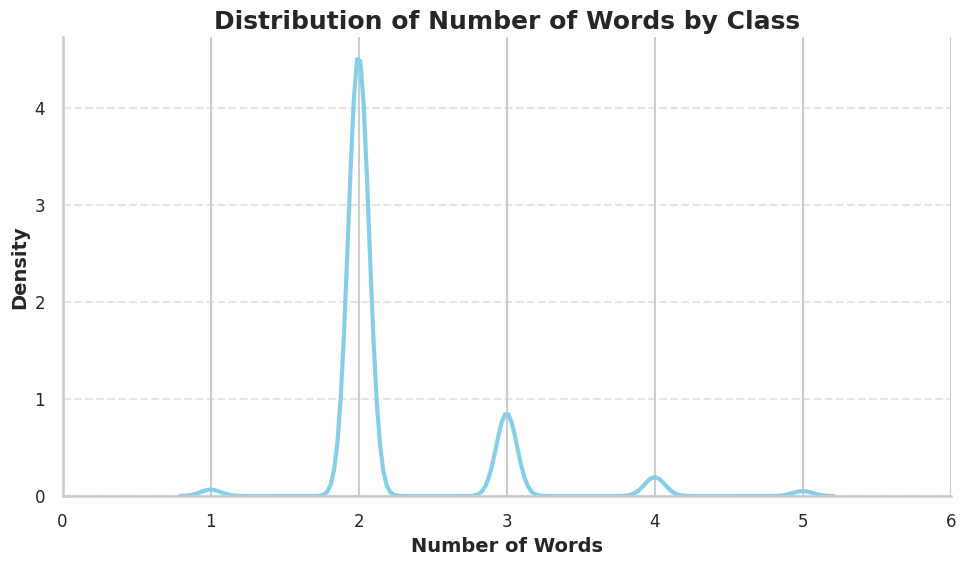

In [70]:
# Set the style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the KDE plot
sns.kdeplot(data['text'].apply(lambda x: len(x.split())), color='skyblue', linewidth=3)

# Add title and labels
plt.title('Distribution of Number of Words by Class', fontsize=18, fontweight='bold')
plt.xlabel('Number of Words', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')

# Customize ticks and grid lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove the box around the plot
sns.despine()

# Zoom in by setting x-axis limits
plt.xlim(0, 6)  # Adjust the limits according to your preference

# Show the plot
plt.tight_layout()
plt.show()


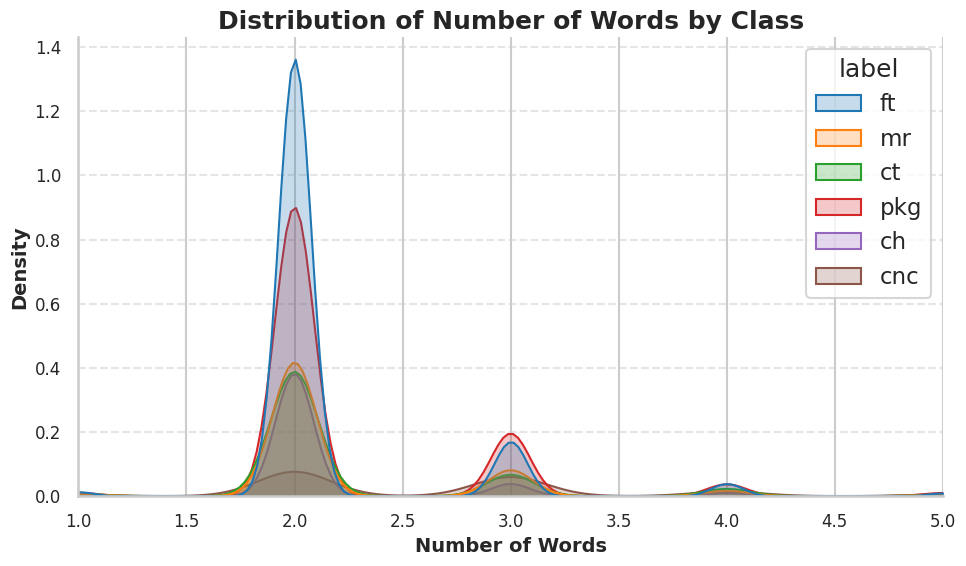

In [75]:
# Set the style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the KDE plot
sns.kdeplot(data=data, x=data['text'].apply(lambda x: len(x.split())), hue='label', shade=True)

# Add title and labels
plt.title('Distribution of Number of Words by Class', fontsize=18, fontweight='bold')
plt.xlabel('Number of Words', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')

# Customize ticks and grid lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove the box around the plot
sns.despine()

# Zoom in by setting x-axis limits
plt.xlim(1, 5)  # Adjust the limits according to your preference

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Analyze dataset size
dataset_size = len(data)
# Analyze text content
unique_words = set()
for text in data['text']:
    words = text.split()
    unique_words.update(words)

# Calculate vocabulary size
vocabulary_size = len(unique_words)
print("Dataset Size:", dataset_size)
print("Vocabulary Size:", vocabulary_size)

Dataset Size: 36111
Vocabulary Size: 19531


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder

# Initialize CountVectorizer and TfidfVectorizer
count_vectorizer = CountVectorizer(max_features=7000)  # Approx 1/3 of Vocabulary Size (tradeoff)
tfidf_vectorizer = TfidfVectorizer(max_features=7000)

# Apply CountVectorizer and TfidfVectorizer to the text data
bow_features = count_vectorizer.fit_transform(data['text'])
tfidf_features = tfidf_vectorizer.fit_transform(data['text'])

# Combine BoW and TF-IDF features
combined_features = hstack([bow_features, tfidf_features])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.30, random_state=28)

# Model training
classifier = SVC(kernel='rbf')  # You can change the kernel for non-linearity
classifier.fit(X_train, y_train)

# Model evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# F1 score for each class
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.8852685988554551
              precision    recall  f1-score   support

          ch       0.95      0.84      0.89      1073
         cnc       0.90      0.75      0.82       725
          ct       0.96      0.89      0.93      1467
          ft       0.82      0.95      0.88      3247
          mr       0.89      0.81      0.85      1527
         pkg       0.91      0.89      0.90      2795

    accuracy                           0.89     10834
   macro avg       0.90      0.86      0.88     10834
weighted avg       0.89      0.89      0.89     10834



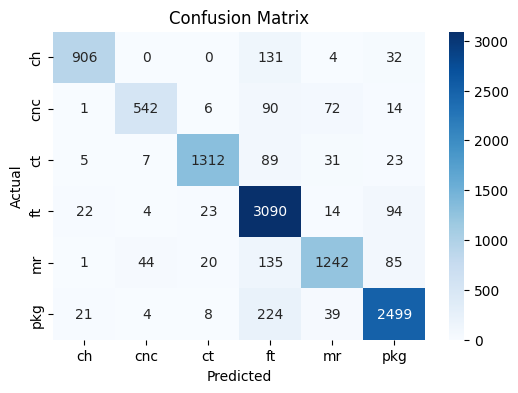

In [ ]:
# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#print("Confusion Matrix:")
#print(conf_matrix)

# Plot confusion matrix as a heatmap with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from joblib import dump
dump(label_encoder, '/content/drive/MyDrive/Visable Cdoing Challange/label_encoder.joblib')
dump(count_vectorizer, '/content/drive/MyDrive/Visable Cdoing Challange/count_vectorizer.joblib')
dump(tfidf_vectorizer, '/content/drive/MyDrive/Visable Cdoing Challange/tfidf_vectorizer.joblib')
dump(classifier, '/content/drive/MyDrive/Visable Cdoing Challange/classifierSVC.joblib')

## Findinds and justifications


1.   The prepare_data() function performs data cleaning and   preprocessing
  tasks to ensure the dataset is suitable for further analysis or modeling. Here's a summary of its key functionalities:

  **Handling Missing Values**:

  > The function starts by dropping rows with missing values (NaN) to ensure data integrity.
  
  **Text Filtering:**

  > Regular expressions are used to define patterns for identifying invalid text, including emails and Chinese characters.
  Rows containing these patterns in the 'text' column are filtered out using boolean indexing.
  
 **Text Preprocessing:**
  > Text preprocessing is performed to standardize the text data:
  Lowercasing: Converts all text to lowercase for consistency.
  Tokenization: Splits text into individual tokens (words).
  Stopword Removal: Removes common German stopwords to focus on meaningful content.

  **Special Character Removal**:
  > Eliminates brackets and special characters from the text.
  
  **Decimal Removal**:
  >Eliminates decimal points and hyphens from the text.
  
  **Outlier Detection and Removal**:
  >The number of words in each text entry is calculated and stored in a new column named 'num_words'.
  Z-scores are computed for the number of words to detect outliers.
  A threshold of 3 standard deviations from the mean is defined to identify outliers.
  Outliers are filtered out based on the defined threshold, and the 'num_words' column is dropped from the dataset.
  Return Data:

  **The function returns the preprocessed dataset, excluding outliers, ready for further analysis or modeling**.



---


**Feature Extraction:**

>Two types of feature extraction techniques are used: CountVectorizer and TfidfVectorizer.
CountVectorizer converts text data into a matrix of token counts.
TfidfVectorizer converts text data into a matrix of TF-IDF features, which represent the importance of a word in the document relative to the entire corpus.

**Combining Features**:
>The features extracted from CountVectorizer and TfidfVectorizer are combined using hstack to create a single feature matrix.

**Label Encoding:**
>The labels in the 'label' column are encoded using LabelEncoder to convert categorical labels into numerical format for model training.

**Train-Test Split:**
>The dataset is split into training and testing sets using train_test_split from sklearn.model_selection.
70% of the data is used for training, and 30% is used for testing.

**Model Training:**
>A Support Vector Classifier (SVC) model with a radial basis function (RBF) for non linearity kernel is trained using the combined feature matrix (X_train) and encoded labels (y_train).

**Model Evaluation:**
>The trained model is used to make predictions on the test data (X_test).
Accuracy is calculated by comparing the predicted labels with the actual labels (y_test).
The classification_report function from sklearn.metrics provides a detailed report of precision, recall, and F1-score for each class, as well as overall metrics.

**Interpretation:**
>The model achieves an overall accuracy of approximately 88.5% on the test data.
The F1-score, which considers both precision and recall, provides a balanced measure of model performance for each class.
The macro avg and weighted avg metrics provide overall measures of model performance across all classes, considering class imbalance.

**Justifications:**
> The F1-score for each class indicates the harmonic mean of precision and recall, reflecting the model's ability to correctly classify instances while considering false positives and false negatives.
High F1-scores (>0.8) suggest that the model performs well across classes, with relatively balanced precision and recall.
The macro avg and weighted avg metrics provide insights into overall model performance, considering class imbalance and differences in class support.





# Language Model BERT


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification, DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train Encodings Shape: {'input_ids': (28888, 5), 'token_type_ids': (28888, 5), 'attention_mask': (28888, 5)}
Val Encodings Shape: {'input_ids': (7223, 5), 'token_type_ids': (7223, 5), 'attention_mask': (7223, 5)}
****************************************************************************************************
Epoch 1/50
723/723 [==============================] - 148s 128ms/step - loss: 0.9070 - accuracy: 0.6883 - val_loss: 0.7487 - val_accuracy: 0.7451
Epoch 2/50
723/723 [==============================] - 87s 120ms/step - loss: 0.6363 - accuracy: 0.7929 - val_loss: 0.7407 - val_accuracy: 0.7558
Epoch 3/50
723/723 [==============================] - 83s 114ms/step - loss: 0.5135 - accuracy: 0.8311 - val_loss: 0.7757 - val_accuracy: 0.7565
Epoch 4/50
723/723 [==============================] - 87s 120ms/step - loss: 0.4322 - accuracy: 0.8573 - val_loss: 0.7675 - val_accuracy: 0.7619
Epoch 5/50
723/723 [==============================] - 87s 120ms/step - loss: 0.3785 - accuracy: 0.8725 - 

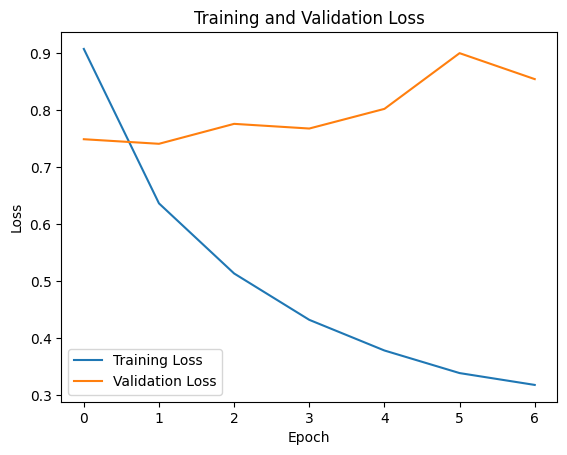

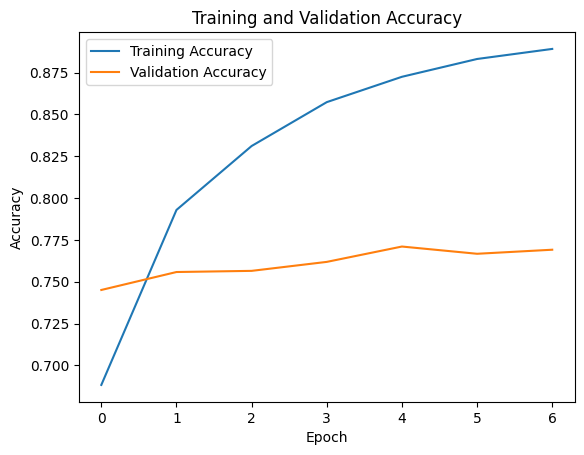

226/226 [==============================] - 14s 60ms/step - loss: 0.7237 - accuracy: 0.7616
Validation Loss: 0.7236806750297546
Validation Accuracy: 0.7615948915481567
226/226 [==============================] - 14s 47ms/step
Weighted F1 Score: 0.7618688105980868


In [ ]:
# Load German BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-german-cased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-german-cased', num_labels=6)

# Split the data into training and testing sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=1997)

# Tokenize and preprocess input data
train_encodings = tokenizer(train_texts.tolist(), padding=True, truncation=True, max_length=5, return_tensors='tf')
val_encodings = tokenizer(val_texts.tolist(), padding=True, truncation=True, max_length=5, return_tensors='tf')
print("Train Encodings Shape:", {key: np.array(val).shape for key, val in train_encodings.items()})
print("Val Encodings Shape:", {key: np.array(val).shape for key, val in val_encodings.items()})
print("*" * 100)

# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)

for layer in model.layers[:-4]:
    layer.trainable = False

# Fine-tune the pretrained model on your classification task
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Convert BatchEncoding object to a hashable form (tuple)
input_ids = tf.convert_to_tensor(train_encodings['input_ids'])
attention_mask = tf.convert_to_tensor(train_encodings['attention_mask'])
val_ids = tf.convert_to_tensor(val_encodings['input_ids'])
val_attention_mask = tf.convert_to_tensor(val_encodings['attention_mask'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    (input_ids, attention_mask),
    train_labels,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    shuffle=True
)

# Save the model in the TensorFlow SavedModel format
model.save('/content/drive/MyDrive/', save_format='tf')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model
val_loss, val_accuracy = model.evaluate((val_ids, val_attention_mask), val_labels)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Predict on validation set
y_pred_prob = model.predict((val_ids, val_attention_mask))
logits = y_pred_prob.logits
probabilities = tf.nn.softmax(logits, axis=-1)
y_pred = np.argmax(probabilities, axis=1)

# Calculate F1 score
f1 = f1_score(val_labels, y_pred, average='weighted')
print("Weighted F1 Score:", f1)


In [ ]:
# Save the model architecture and weights
model_dir = '/content/drive/MyDrive/saved'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
model.save_pretrained(model_dir,)

# Future scope

 I wanted to exploring different variants of BERT, such as RoBERTa, DistilBERT, or ALBERT, offers insights into the impact of model architecture and size on classification tasks



*   Pretrained language models like BERT have learned rich contextual representations from vast amounts of text data. Fine-tuning BERT on a task-specific dataset helps adapt the model's knowledge to the classification task at hand.
I would fine-tune the BERT model on the classification dataset, allowing it to learn task-specific patterns and nuances
* Hyperparameter Tuning and Optimization: Fine-tuning BERT involves tuning various hyperparameters such as learning rate, batch size, dropout rate, and the number of training epochs to achieve optimal performance.
I would experiment with different hyperparameter configurations using techniques like grid search or random search to identify the most effective settings for the classification task.


